In [1]:
# KaggleX Cohert 4 Skill Assessment Challenge

## Import Library and Download Dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import copy

2024-06-16 15:48:49.788363: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 15:48:49.788462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 15:48:49.925465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Dataset paths
train_path = "/kaggle/input/kagglex-car-price-prediction-dataset/train.csv"
test_path = "/kaggle/input/kagglex-car-price-prediction-dataset/test.csv"

df = pd.read_csv(train_path)
unedited_df = copy.deepcopy(df)
test_df = pd.read_csv(test_path)
unedited_test_df = copy.deepcopy(test_df)

## Check data

In [4]:
df.shape

(54273, 13)

In [5]:
test_df.shape

(36183, 12)

In [6]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [7]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [8]:
df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [11]:
df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [12]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


### Based on the data
- #### Too many models and engine
- #### Engine could probably be broken down into more features

## Exploratory Data Analysis (EDA)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [14]:
categorical_features = [
    "brand",
    "model",
    "fuel_type",
    "engine",
    "transmission",
    "ext_col",
    "int_col",
    "accident",
    "clean_title",
]

numerical_features = [
    "milage",
    "model_year",
#     "horsepower",
#     "accident",
#     "num_cylinders",
#     "displacement"
]

print(f"Number of Columns: {len(df.columns)}")
print(f"Number of Categorical Features: {len(categorical_features)}")
print(f"Number of Numerical Features: {len(numerical_features)}")

Number of Columns: 13
Number of Categorical Features: 9
Number of Numerical Features: 2


### The 2 columns not used as features are:
- #### id
- #### price, which will be the label

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


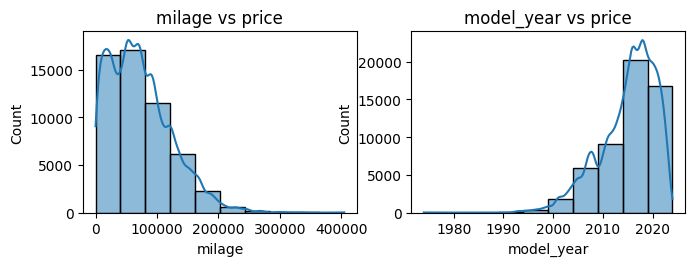

In [15]:
plt.figure(figsize=(12, 8))
for index, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, index)
    sns.histplot(data=df[feature], bins=10, kde=True)
    plt.title(f"{feature} vs price")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

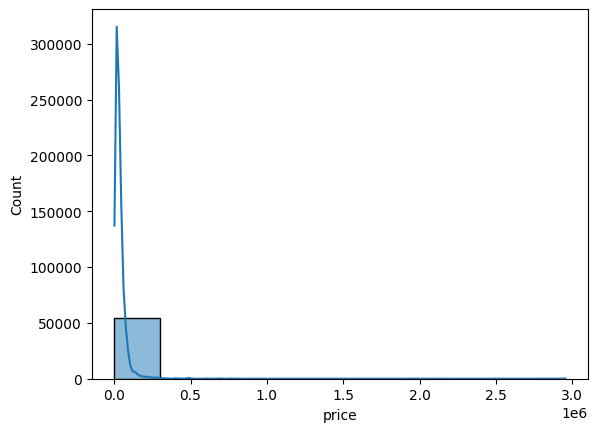

In [16]:
# Plot price
sns.histplot(data=df["price"], bins=10, kde=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


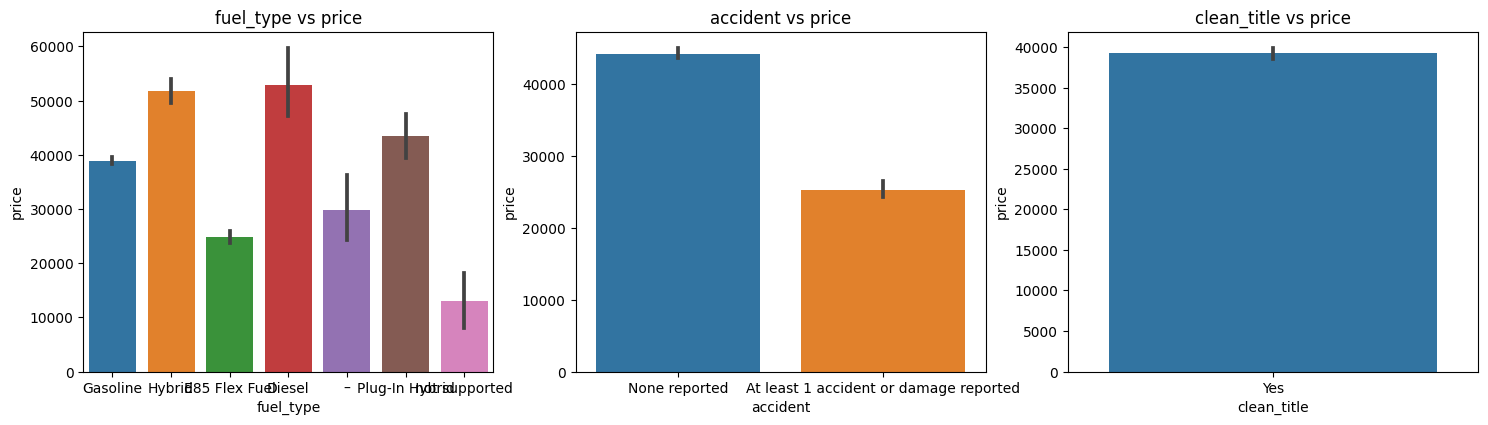

In [18]:
categorical_few_uniques_features = [
    "fuel_type", 
    "accident", 
    "clean_title"
#     "ext_col",
#     "int_col",
#     "engine_shape",
#     "transmission"
]


plt.figure(figsize=(18, 15))
for index, feature in enumerate(categorical_few_uniques_features, start=1):
    plt.subplot(3, 3, index)
    sns.barplot(data=df, x=feature, y="price")
    plt.title(f"{feature} vs price")
plt.show()

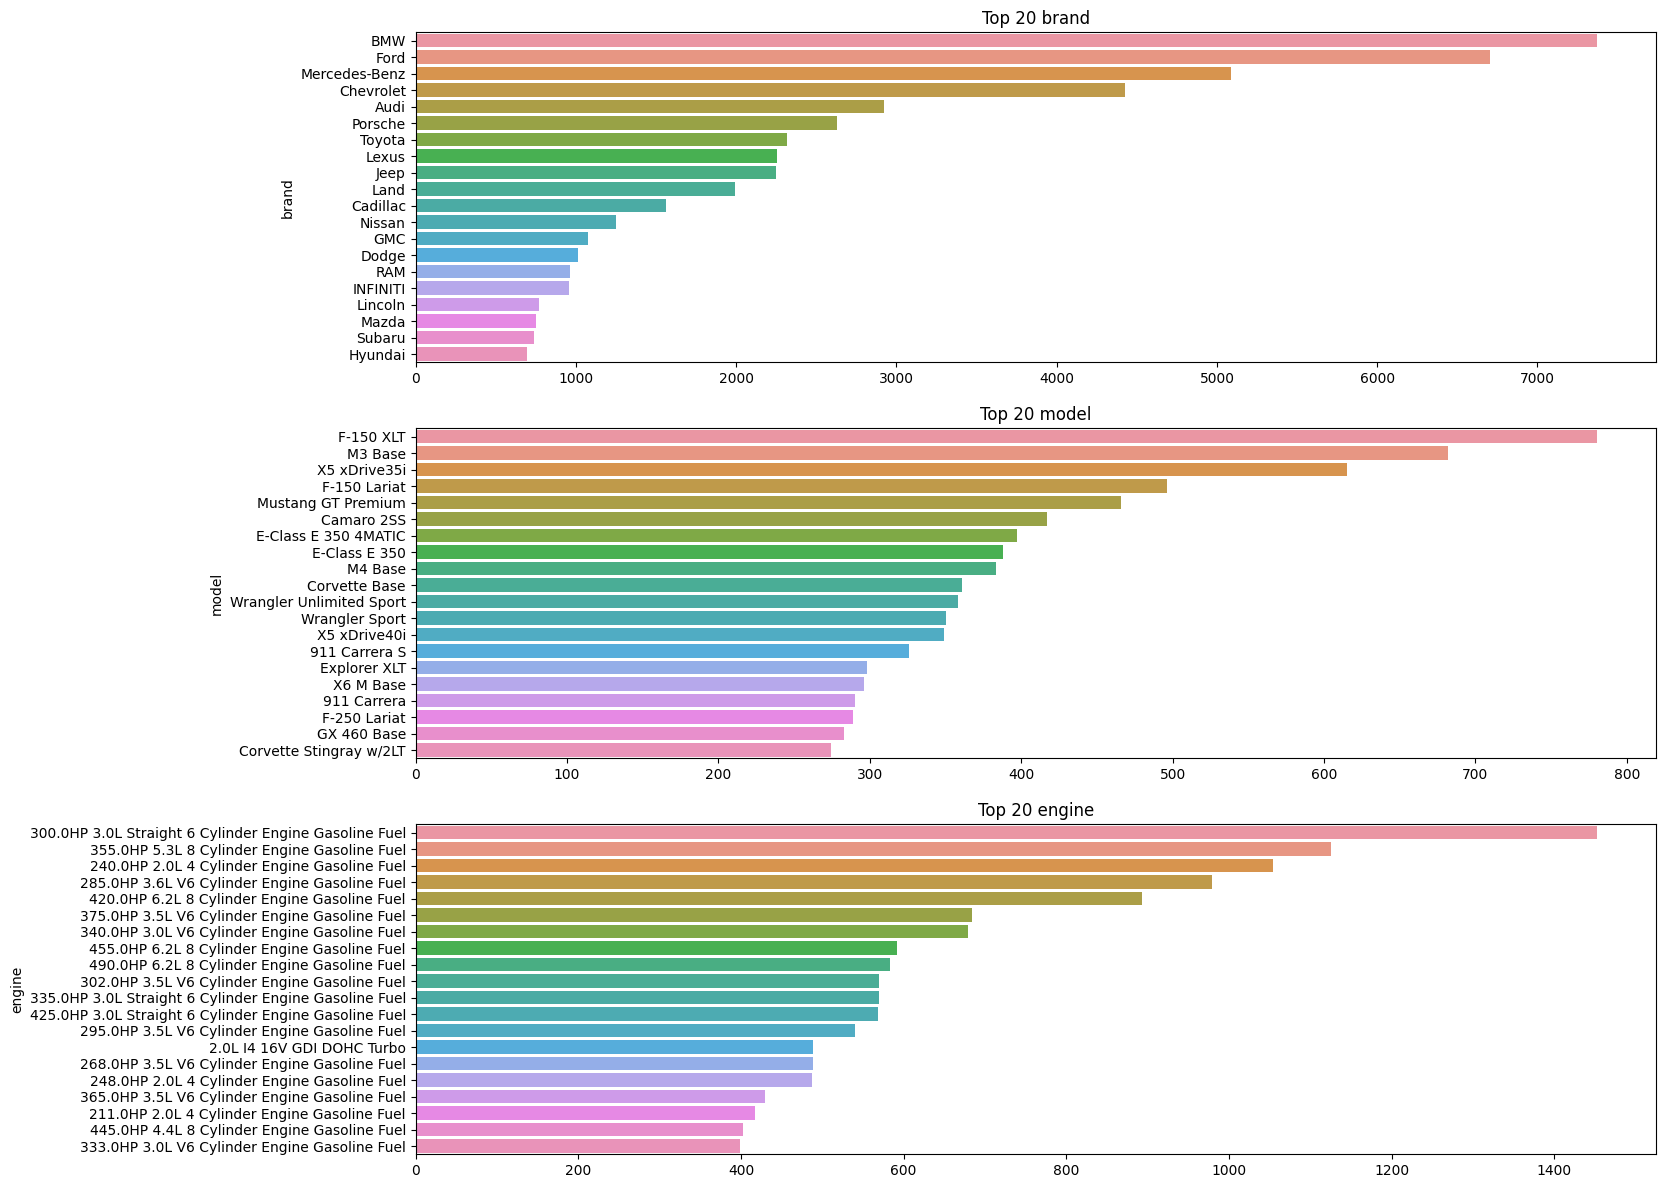

In [19]:
categorical_many_unique_features = [
    "brand",
    "model",
    "engine",
#     "transmission",
#     "ext_col",
#     "int_col",
]

plt.figure(figsize=(16, 30))
for index, feature in enumerate(categorical_many_unique_features, start=1):
    common_features = df[feature].value_counts().head(20)
    plt.subplot(6, 1, index)
    sns.barplot(x=common_features.values, y=common_features.index)
    plt.title(f"Top 20 {feature}")

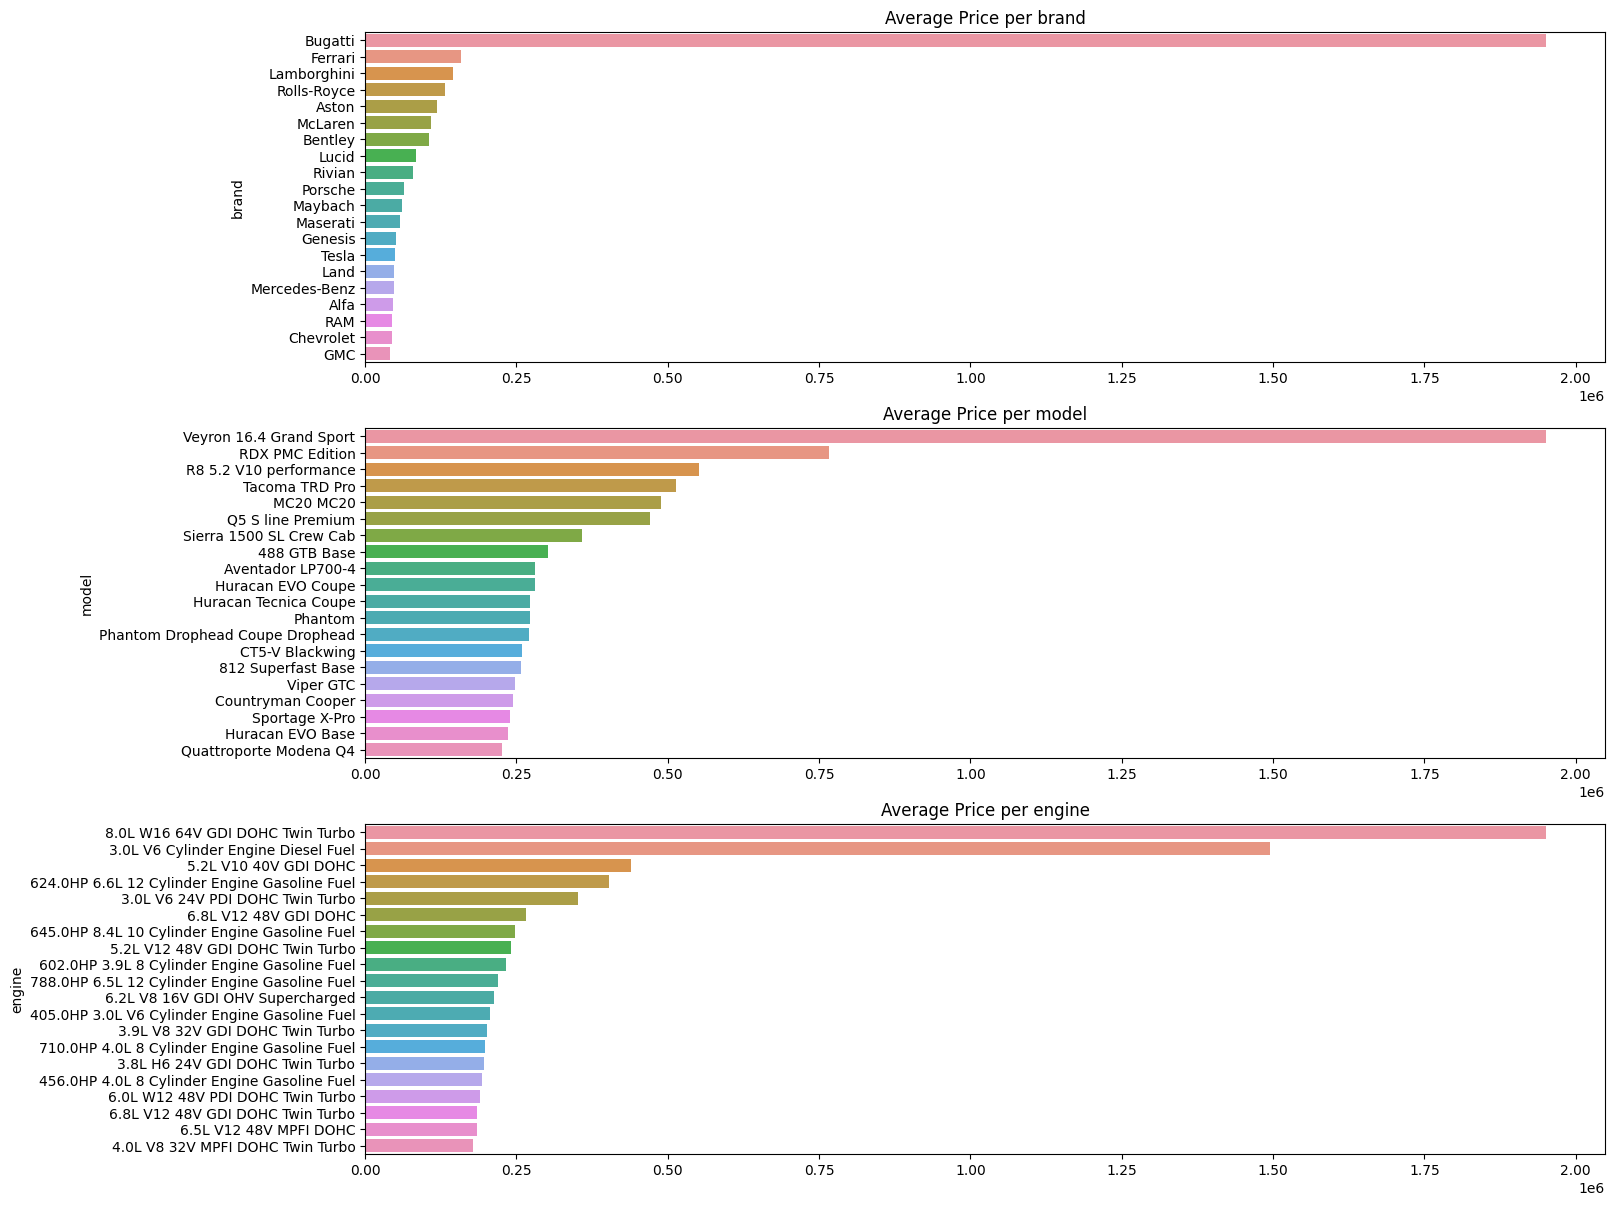

In [20]:
plt.figure(figsize=(16, 30))
for index, feature in enumerate(categorical_many_unique_features, start=1):
    feature_mean = df.groupby(feature)["price"].mean().sort_values(ascending=False).head(20)
    plt.subplot(6, 1, index)
    sns.barplot(x=feature_mean.values, y=feature_mean.index)
    plt.title(f"Average Price per {feature}")

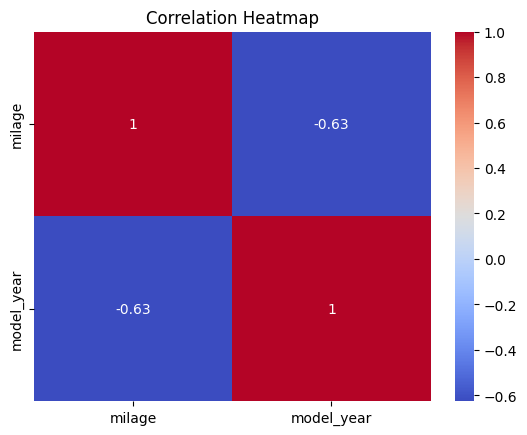

In [21]:
# Plot heatmap
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
# For testing
# df.groupby("model")["price"].mean().sort_values(ascending=False)
df["engine"].value_counts().head(50)
print(df.groupby("model")["price"].mean().sort_values(ascending=False))

df.groupby("model")["price"].mean().mean()

model
Veyron 16.4 Grand Sport    1.950995e+06
RDX PMC Edition            7.658155e+05
R8 5.2 V10 performance     5.511535e+05
Tacoma TRD Pro             5.139372e+05
MC20 MC20                  4.890000e+05
                               ...     
allroad 2.7T               5.833333e+03
RSX Base                   5.400000e+03
Vue Hybrid Base            4.370000e+03
S-10 LS                    4.200000e+03
Prowler Base               3.850000e+03
Name: price, Length: 1827, dtype: float64


42302.752114994466

## Data Preprocessing

### Simplifying model feature

In [23]:
# Simplify model feature by only getting the first word
prev_num_of_unique = unedited_df["model"].nunique()

df["model"] = df["model"].apply(lambda x: x.split(" ")[0])
test_df["model"] = df["model"].apply(lambda x: x.split(" ")[0])


print(prev_num_of_unique)
df["model"].nunique()

1827


502

### Cleaning Fuel Type

#### Gasoline is closest to mean, so we replace nulls (–) with Gasoline

In [24]:
def clean_fuel_type(text):
    """ Clean fuel type feature using keywords """
    words = text.split()
    for word in words:
        word = word.lower()
        if word == "–" or word == "not":
            return "tmp"
        
        if word == "hybrid":
            return "Hybrid"
        
    return text

In [25]:
# Ensure fuel type is not yet edited
df["fuel_type"] = unedited_df["fuel_type"]
test_df["fuel_type"] = unedited_test_df["fuel_type"]

# Clean fuel types
df["fuel_type"] = df["fuel_type"].apply(clean_fuel_type)
test_df["fuel_type"] = test_df["fuel_type"].apply(clean_fuel_type)

In [26]:
# Get the most common fuel type to be used for no/invalid fuel type shape
with_fuel_type = df["fuel_type"].value_counts().sort_values(ascending=False)
fuel_types = with_fuel_type.index
common_fuel_type = fuel_types[0]
common_fuel_type

'Gasoline'

In [27]:
# Replace no/invalid fuel type to the most common fuel type
df.loc[df["fuel_type"] == "tmp","fuel_type"] = common_fuel_type
test_df.loc[test_df["fuel_type"] == "tmp","fuel_type"] = common_fuel_type

In [28]:
print(unedited_df[["fuel_type"]].head())
print(df[["fuel_type"]].head())

  fuel_type
0  Gasoline
1  Gasoline
2  Gasoline
3    Hybrid
4  Gasoline
  fuel_type
0  Gasoline
1  Gasoline
2  Gasoline
3    Hybrid
4  Gasoline


### Extract horsepower

In [29]:
def extract_horsepower(text):
    """ Extract horsepower using the HP keyword """
    words = text.split()
    for word in words:
        if word[-2:] == "HP":
            return int(float(word[:-2]))
    return "tmp"

In [30]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]


# Filter the horsepower from engine feature
df["horsepower"] = df["engine"].apply(extract_horsepower)
test_df["horsepower"] = test_df["engine"].apply(extract_horsepower)

In [31]:
# Get the mean from the valid horsepowers to be used for no/invalid horsepower
with_horsepower = df.loc[df["horsepower"] != 'tmp', 'horsepower']
horsepower_ave = round(with_horsepower.mean())

print(horsepower_ave)

332


In [32]:
# Replace no/invalid horsepower to the average horsepower
df.loc[df["horsepower"] == "tmp","horsepower"] = horsepower_ave
test_df.loc[test_df["horsepower"] == "tmp","horsepower"] = horsepower_ave

In [33]:
# Convert the horsepower column/feature to int
df["horsepower"] = df["horsepower"].apply(pd.to_numeric)
test_df["horsepower"] = test_df["horsepower"].apply(pd.to_numeric)

In [34]:
# print(unedited_df["engine"].head())
# df["horsepower"].head()
df[["engine", "horsepower"]].head()

,engine,horsepower
0,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,375
1,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,300
2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,300
3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,335
4,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,200


### Extract displacement (Liters denoted as L)

In [35]:
def extract_displacement(text):
    """ Extract displacement using the L and Liters keyword """
    words = text.split()
    for index, word in enumerate(words):
        if word[-1] == "L":
            return float(word[:-1])
#             return "VALID"
#             return text
        if  word == "Liter" and index > 0:
#             return "VALID" 
#             print(text[index - 1], word)
            return  float(words[index - 1])
#             return text

    return "tmp"
#     return text

In [36]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]


# Filter the horsepower from engine feature
df["displacement"] = df["engine"].apply(extract_displacement)
test_df["displacement"] = test_df["engine"].apply(extract_displacement)

In [37]:
# Get the mean from the valid displacement to be used for no/invalid displacement
with_displacement = df.loc[df["displacement"] != 'tmp', 'displacement']
displacement_ave = round(with_displacement.mean(), 1)
displacement_ave

3.7

In [38]:
# Replace no/invalid displacement to the average displacement
df.loc[df["displacement"] == "tmp","displacement"] = displacement_ave
test_df.loc[test_df["displacement"] == "tmp","displacement"] = displacement_ave

In [39]:
# Convert the displacement column/feature to float
df["displacement"] = df["displacement"].apply(pd.to_numeric)
test_df["displacement"] = test_df["displacement"].apply(pd.to_numeric)

In [40]:
# print(unedited_df["engine"].head())
df[["engine", "displacement"]].head()

,engine,displacement
0,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,3.5
1,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,3.0
2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,4.2
3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,3.0
4,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,3.8


### Extract Number of Cylinders

In [41]:
def extract_num_cylinders(text):
    """ Extract number of cylinders using I, H, V, W, and Cylinder keywords """
#     print(text.split())
    words = text.split()
    types_of_cylinders = ["I", "H", "V", "W"]
    for index, word in enumerate(words):

        if  word == "Cylinder":
#             return "VALID" 
#             print(text[index - 1], word)
            return  int(words[index - 1])
#             return text

        if word[0] in types_of_cylinders:
            word = word.replace("-", "")
            if 2 <= len(word) <= 3 and word[1].isdigit():
#                 return "VALID" 
                return int(word[1:])
#             return text

    return "tmp"
#     return text

In [42]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]

# Extract the num of cylinders from engine feature
df["num_cylinders"] = df["engine"].apply(extract_num_cylinders)
test_df["num_cylinders"] = test_df["engine"].apply(extract_num_cylinders)

In [43]:
# Get the mean from the valid num of cylinders to be used for no/invalid num of cylinders
with_num_cylinders = df.loc[df["num_cylinders"] != 'tmp', 'num_cylinders']
num_cylinders_ave = round(with_num_cylinders.mean())
num_cylinders_ave

6

In [44]:
# Replace no/invalid num of cylinders to the average num of cylinders
df.loc[df["num_cylinders"] == "tmp","num_cylinders"] = num_cylinders_ave
test_df.loc[test_df["num_cylinders"] == "tmp","num_cylinders"] = num_cylinders_ave

In [45]:
# Convert the num of cylinders column/feature to int
df["num_cylinders"] = df["num_cylinders"].apply(pd.to_numeric)
test_df["num_cylinders"] = test_df["num_cylinders"].apply(pd.to_numeric)

In [46]:
df[["engine", "num_cylinders"]].tail()

,engine,num_cylinders
54268,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8
54269,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,4
54270,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6
54271,4.0L H6 24V GDI DOHC,6
54272,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,4


### Extract engine shape

In [47]:
def extract_engine_shape(text):
    """ Extract horsepower using the L and Liters keyword """
    words = text.split()
    types_of_cylinders = ["I", "H", "V", "W"]
    for index, word in enumerate(words):
        if  word.lower() == "straight":
            return "I" 
#             print(text[index - 1], word)
#             return  int(words[index - 1])
            return word

        if  word.lower() == "flat":
            return "H" 
#             print(text[index - 1], word)
#             return  int(words[index - 1])
            return word

        if word.lower() == "rotary":
            return "R"

        if word[0] in types_of_cylinders:
            word = word.replace("-", "")
            if 2 <= len(word) <= 3 and word[1].isdigit():
#                 return "VALID" 
                return word[0]
#             return text

        if  word == "Cylinder":
            return "I" 
#             print(text[index - 1], word)
#             return  int(words[index - 1])
#             return text

    return "tmp"
#     return text

In [48]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]

# Extract the num of cylinders from engine feature
df["engine_shape"] = df["engine"].apply(extract_engine_shape)
test_df["engine_shape"] = test_df["engine"].apply(extract_engine_shape)

In [49]:
# Get the most common engine shape to be used for no/invalid engine shape
with_engine_shape = df["engine_shape"].value_counts().sort_values(ascending=False)
engine_shapes = with_engine_shape.index
common_engine_shape = engine_shapes[0]
common_engine_shape

'I'

In [50]:
# Replace no/invalid num of cylinders to the most common num of cylinders
df.loc[df["engine_shape"] == "tmp","engine_shape"] = common_engine_shape
test_df.loc[test_df["engine_shape"] == "tmp","engine_shape"] = common_engine_shape

In [51]:
df[["engine", "engine_shape"]].head()

,engine,engine_shape
0,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,V
1,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,I
2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,I
3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,I
4,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,V


### Clean transmission feature

In [52]:
def clean_tranmission(text):
    """ Clean tranmission """
    words = text.split()
    automatic_keywords = ["a/t", "automatic", "w/dual", "cvt", "overdrive"]
    manual_keywords = ["m/t", "manual", "mt"]
    for index, word in enumerate(words):

        if  word.lower() in automatic_keywords:
#             return "VALID" 
            return "A/T"
        if  word.lower() in manual_keywords:
#             return "VALID" 
            return "M/T"
        

    return "tmp"
#     return text

In [53]:
# Ensure engine is not yet edited
df["transmission"] = unedited_df["transmission"]
test_df["transmission"] = unedited_test_df["transmission"]

# Extract the num of cylinders from engine feature
df["transmission"] = df["transmission"].apply(clean_tranmission)
test_df["transmission"] = test_df["transmission"].apply(clean_tranmission)

In [54]:
# Get the most common transmission to be used for no/invalid transmission
with_transmission = df["transmission"].value_counts().sort_values(ascending=False)
transmissions = with_transmission.index
common_transmission = transmissions[0]
common_transmission

'A/T'

In [55]:
# Replace no/invalid transmission to the most common transmission
df.loc[df["transmission"] == "tmp","transmission"] = common_transmission
test_df.loc[test_df["transmission"] == "tmp","transmission"] = common_transmission

In [56]:
print(unedited_df[["transmission"]].head())
print(df[["transmission"]].head())

                     transmission
0                    10-Speed A/T
1                     6-Speed M/T
2                     6-Speed A/T
3  Transmission w/Dual Shift Mode
4                             A/T
  transmission
0          A/T
1          M/T
2          A/T
3          A/T
4          A/T


### Clean Exterior and Interior Color Features

In [57]:
### Use numbers for accidents

In [58]:
color_keywords = {
    "Black": [
        "black", 
        "blk", 
        "charcoal", 
        "nero", 
        "beluga", 
        "ebony", 
        "galvanized", 
        "matter", 
        "magnetic", 
        "granite", 
        "tungsten", 
        "onyx", 
        "dark"
    ],
    "Beige":  [
        "beige", 
        "sandstone", 
        "tan", 
        "cappuccino", 
        "parchment"
    ],
    "Gray": [
        "gray", 
        "grey", 
        "ash", 
        "slate", 
        "graystone", 
        "shale", 
        "stone", 
        "graphite", 
        "mesa", 
        "boulder", 
        "pewter", 
        "steel", 
        "rock"
    ],
    "Brown": [
        "brown", 
        "chestnut", 
        "macchiato", 
        "caramel", 
        "camel", 
        "walnut", 
        "mocha", 
        "cocoa", 
        "espresso", 
        "brandy", 
        "bronze", 
        "ametrin"
    ],
    "Red": [
        "red", 
        "auburn", 
        "hotspur", 
        "garnet", 
        "maroon", 
        "rosso"
    ],
    "White": [
        "white", 
        "cashmere", 
        "silver", 
        "titanium", 
        "platinum", 
        "oyster", 
        "linen", 
        "pearl", 
        "chalk", 
        "rift", 
        "quicksilver", 
        "bianco", 
        "glacier"
    ],
    "Gold": [
        "gold", 
        "amber", 
        "yellow"
    ],
    "Blue": [
        "blue", 
        "navy", 
        "ice", 
        "blu", 
        "blueprint", 
        "moonlight", 
        "nightfall", 
        "sea", 
        "mountain"
    ],
    "Green": [
        "green", 
        "cypress", 
        "gecko", 
        "verde"
    ],
    "Orange": [
        "orange", 
        "mango!"
    ],
    "Purple": [
        "purple", 
        "tempest", 
        "plum"
    ],
}

In [59]:
def clean_color(text):
    """ Clean color """
    words = text.split()
    
    for word in words:
        word = word.replace(".", "")
        words = word.split("/")
        
        for word  in words:
            word = word.lower()
            
            for color in color_keywords:
                if word in color_keywords[color]:
                    return color
            
        

    return "tmp"
    return text

In [60]:
# Ensure engine is not yet edited
df["int_col"] = unedited_df["int_col"]
test_df["int_col"] = unedited_test_df["int_col"]

# Extract the num of cylinders from engine feature
df["int_col"] = df["int_col"].apply(clean_color)
test_df["int_col"] = test_df["int_col"].apply(clean_color)

In [61]:
# Ensure engine is not yet edited
df["ext_col"] = unedited_df["ext_col"]
test_df["ext_col"] = unedited_test_df["ext_col"]


# Extract the num of cylinders from engine feature
df["ext_col"] = df["ext_col"].apply(clean_color)
test_df["ext_col"] = test_df["ext_col"].apply(clean_color)

In [62]:
# Get the most common interior color to be used for no/invalid interior color
with_int_col = df["int_col"].value_counts().sort_values(ascending=False)
int_cols = with_int_col.index
common_int_col = int_cols[0]
common_int_col

'Black'

In [63]:
# Get the most common exterior color to be used for no/invalid exterior color
with_ext_col = df["ext_col"].value_counts().sort_values(ascending=False)
ext_cols = with_ext_col.index
common_ext_col = ext_cols[0]
common_ext_col

'White'

In [64]:
# Replace no/invalid interior color to the most common interior color
df.loc[df["int_col"] == "tmp","int_col"] = common_int_col
test_df.loc[test_df["int_col"] == "tmp","int_col"] = common_int_col

In [65]:
# Replace no/invalid interior color to the most common interior color
df.loc[df["ext_col"] == "tmp","ext_col"] = common_ext_col
test_df.loc[test_df["ext_col"] == "tmp","ext_col"] = common_ext_col

In [66]:
print(unedited_df[["int_col"]].tail())
print(df[["int_col"]].tail())

      int_col
54268   Brown
54269   Black
54270   Black
54271   Brown
54272   Black
      int_col
54268   Brown
54269   Black
54270   Black
54271   Brown
54272   Black


In [67]:
print(unedited_df[["ext_col"]].head())
print(df[["ext_col"]].head())

  ext_col
0    Blue
1   Black
2  Purple
3    Gray
4   White
  ext_col
0    Blue
1   Black
2  Purple
3    Gray
4   White


### Convert accidents to number of accients

In [68]:
def count_num_of_accidents(text):
    words = text.split()
    for word in words:
        if word == "None":
            return 0
        if word == "1":
            return 1

In [69]:
# Ensure accidents feature is not yet edited
df["accident"] = unedited_df["accident"]
test_df["accident"] = unedited_test_df["accident"]

# Count the number of accidents and replace the data with it
df["accident"] = df["accident"].apply(count_num_of_accidents)
test_df["accident"] = test_df["accident"].apply(count_num_of_accidents)


In [70]:
# Convert the accident column/feature to type int
df["accident"] = df["accident"].apply(pd.to_numeric)
test_df["accident"] = test_df["accident"].apply(pd.to_numeric)

In [71]:
print(unedited_df[["accident"]].tail())
print(df[["accident"]].tail())

                                     accident
54268                           None reported
54269  At least 1 accident or damage reported
54270  At least 1 accident or damage reported
54271                           None reported
54272                           None reported
       accident
54268         0
54269         1
54270         1
54271         0
54272         0


### Drop clean title since all data are the same in that column

In [72]:
df = df.drop("clean_title", axis="columns", errors="ignore")
test_df = test_df.drop("clean_title", axis="columns", errors="ignore")

### Drop engine feature since it is unclean and that we already engineered new features from it

In [73]:
df = df.drop("engine", axis="columns", errors="ignore")
test_df = test_df.drop("engine", axis="columns", errors="ignore")

In [74]:
cleaned_df = copy.deepcopy(df)
cleaned_test_df = copy.deepcopy(test_df)

### Find outliers in our label (Price)

<Axes: xlabel='price'>

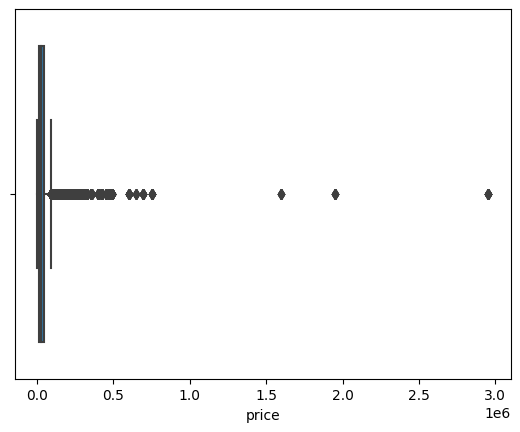

In [75]:
sns.boxplot(data=cleaned_df, x="price")

In [76]:
# Get IQR 
Q1 = cleaned_df["price"].quantile(0.25)
Q3 = cleaned_df["price"].quantile(0.75)
IQR = Q3 - Q1
IQR

29500.0

In [77]:
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

print(f"range: {lower_bound:,} to {upper_bound:,}")

range: -28,750.0 to 89,250.0


In [78]:
non_outliers = df[ (df["price"] > lower_bound) & (df["price"] < upper_bound) ]

num_non_outliers = len(non_outliers)
num_outliers = len(df) - num_non_outliers

print(f"Non-outliers: {num_non_outliers}")
print(f"Outliers: {num_outliers}")
print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

Non-outliers: 51176
Outliers: 3097
Percentage of Outliers: 5.7063


In [79]:
df = non_outliers

<Axes: xlabel='price'>

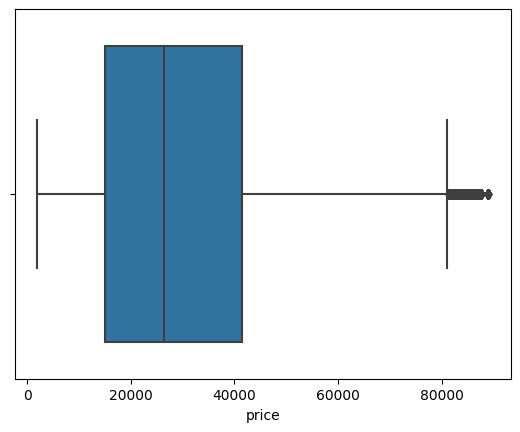

In [80]:
sns.boxplot(data=df, x="price")

### Find outliers for milage feature

<Axes: xlabel='milage'>

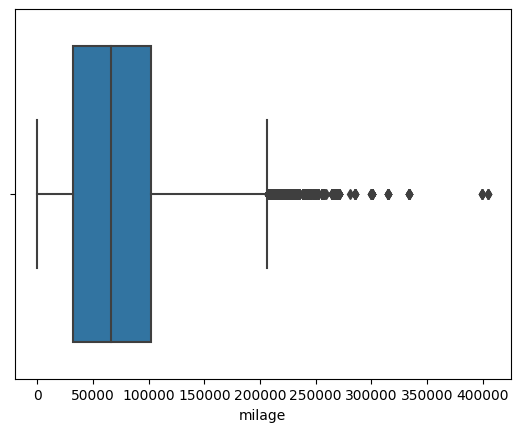

In [81]:
sns.boxplot(data=cleaned_df, x="milage")

In [82]:
# Get IQR 
Q1 = cleaned_df["milage"].quantile(0.25)
Q3 = cleaned_df["milage"].quantile(0.75)
IQR = Q3 - Q1
IQR

69732.0

In [83]:
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

print(f"range: {lower_bound:,} to {upper_bound:,}")

range: -72,330.0 to 206,598.0


In [84]:
non_outliers = df[ (df["milage"] > lower_bound) & (df["milage"] < upper_bound) ]

num_non_outliers = len(non_outliers)
num_outliers = len(df) - num_non_outliers

print(f"Non-outliers: {num_non_outliers}")
print(f"Outliers: {num_outliers}")
print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

Non-outliers: 50460
Outliers: 716
Percentage of Outliers: 1.3991


In [85]:
df = non_outliers

<Axes: xlabel='milage'>

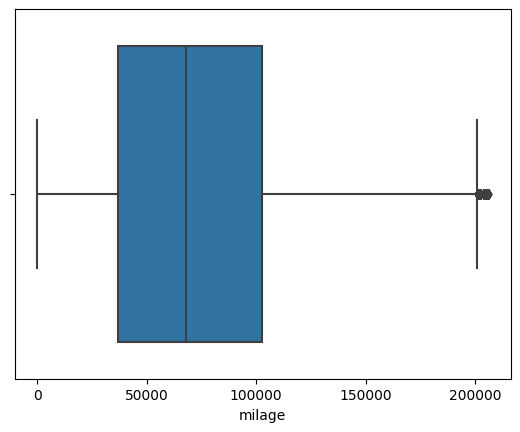

In [86]:
sns.boxplot(data=df, x="milage")

### Find outliers for model_year feature

<Axes: xlabel='model_year'>

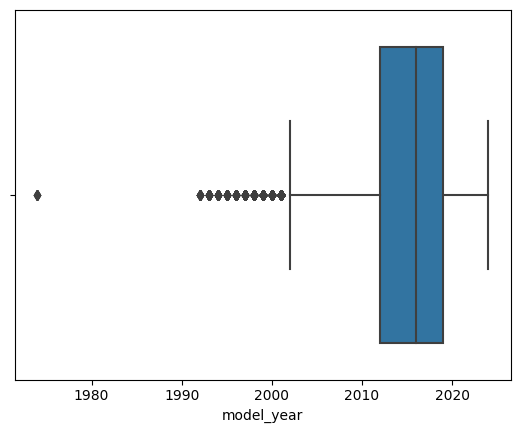

In [87]:
sns.boxplot(data=cleaned_df, x="model_year")

In [88]:
# Get IQR 
Q1 = cleaned_df["model_year"].quantile(0.25)
Q3 = cleaned_df["model_year"].quantile(0.75)
IQR = Q3 - Q1
IQR

7.0

In [89]:
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

print(f"range: {lower_bound} to {upper_bound}")

range: 2001.5 to 2029.5


In [90]:
non_outliers = df[ (df["model_year"] > lower_bound) & (df["model_year"] < upper_bound) ]

num_non_outliers = len(non_outliers)
num_outliers = len(df) - num_non_outliers

print(f"Non-outliers: {num_non_outliers}")
print(f"Outliers: {num_outliers}")
print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

Non-outliers: 49383
Outliers: 1077
Percentage of Outliers: 2.1344


In [91]:
df = non_outliers

<Axes: xlabel='model_year'>

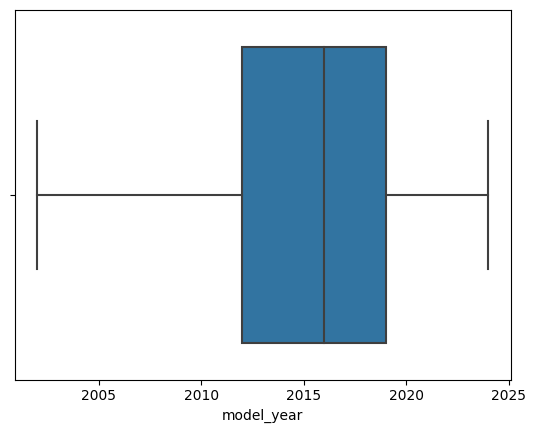

In [92]:
sns.boxplot(data=df, x="model_year")

### Find outliers in horsepower feature

<Axes: xlabel='horsepower'>

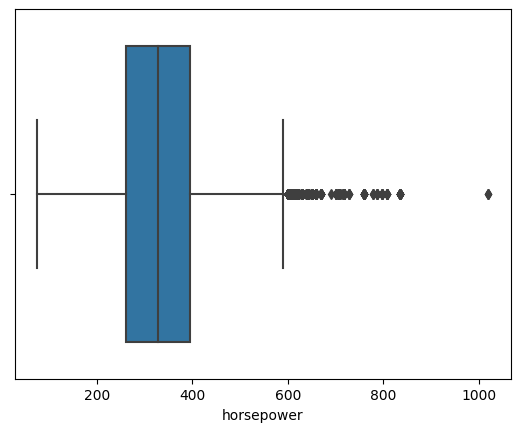

In [93]:
sns.boxplot(data=cleaned_df, x="horsepower")

In [94]:
# Get IQR 
Q1 = cleaned_df["horsepower"].quantile(0.25)
Q3 = cleaned_df["horsepower"].quantile(0.75)
IQR = Q3 - Q1
IQR

134.0

In [95]:
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

print(f"range: {lower_bound} to {upper_bound}")

range: 60.0 to 596.0


In [96]:
non_outliers = df[ (df["horsepower"] > lower_bound) & (df["horsepower"] < upper_bound) ]

num_non_outliers = len(non_outliers)
num_outliers = len(df) - num_non_outliers

print(f"Non-outliers: {num_non_outliers}")
print(f"Outliers: {num_outliers}")
print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

Non-outliers: 48754
Outliers: 629
Percentage of Outliers: 1.2737


In [97]:
df = non_outliers

<Axes: xlabel='horsepower'>

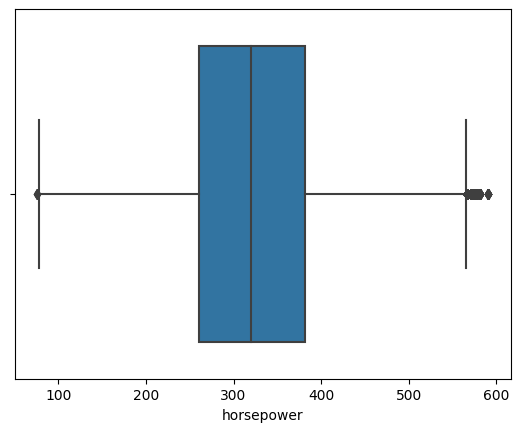

In [98]:
sns.boxplot(data=df, x="horsepower")

### Find outliers in displacement

<Axes: xlabel='displacement'>

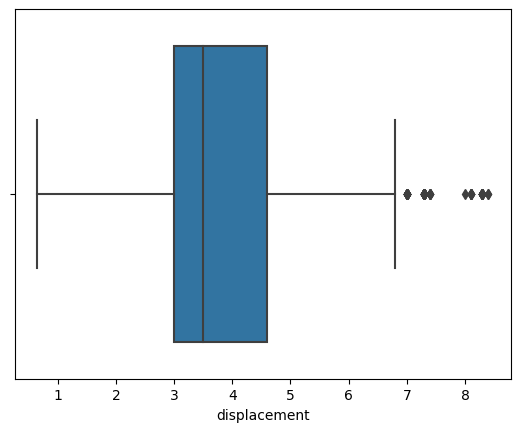

In [99]:
sns.boxplot(data=cleaned_df, x="displacement")

In [100]:
# Get IQR 
Q1 = cleaned_df["displacement"].quantile(0.25)
Q3 = cleaned_df["displacement"].quantile(0.75)
IQR = Q3 - Q1
IQR

1.5999999999999996

In [101]:
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

print(f"range: {lower_bound:.2f} to {upper_bound:.2f}")

range: 0.60 to 7.00


In [102]:
non_outliers = df[ (df["displacement"] > lower_bound) & (df["displacement"] < upper_bound) ]

num_non_outliers = len(non_outliers)
num_outliers = len(df) - num_non_outliers

print(f"Non-outliers: {num_non_outliers}")
print(f"Outliers: {num_outliers}")
print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

Non-outliers: 48657
Outliers: 97
Percentage of Outliers: 0.1990


In [103]:
df = non_outliers

<Axes: xlabel='displacement'>

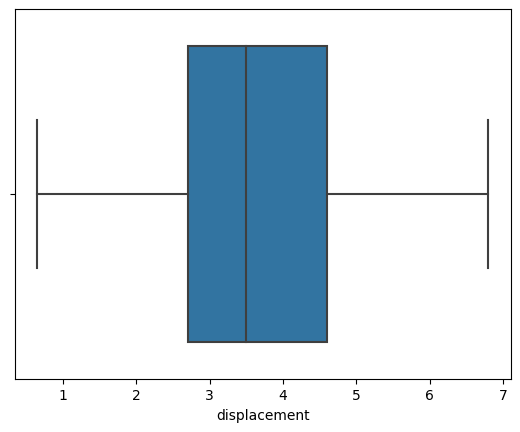

In [104]:
sns.boxplot(data=df, x="displacement")

### Find outliers in displacement

<Axes: xlabel='num_cylinders'>

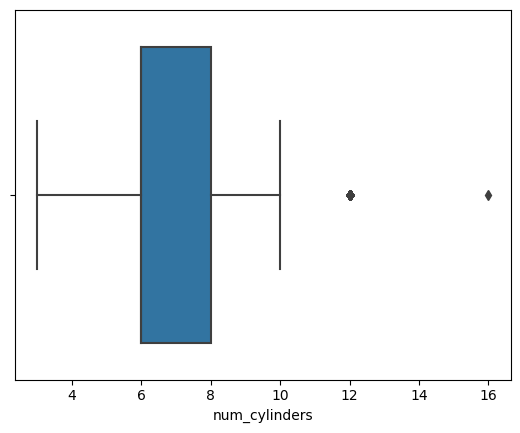

In [105]:
sns.boxplot(data=cleaned_df, x="num_cylinders")

In [106]:
# Get IQR 
Q1 = cleaned_df["num_cylinders"].quantile(0.25)
Q3 = cleaned_df["num_cylinders"].quantile(0.75)
IQR = Q3 - Q1
IQR

2.0

In [107]:
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

print(f"range: {lower_bound:.2f} to {upper_bound:.2f}")

range: 3.00 to 11.00


In [108]:
non_outliers = df[ (df["num_cylinders"] > lower_bound) & (df["num_cylinders"] < upper_bound) ]

num_non_outliers = len(non_outliers)
num_outliers = len(df) - num_non_outliers

print(f"Non-outliers: {num_non_outliers}")
print(f"Outliers: {num_outliers}")
print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

Non-outliers: 48304
Outliers: 353
Percentage of Outliers: 0.7255


In [109]:
df = non_outliers

<Axes: xlabel='num_cylinders'>

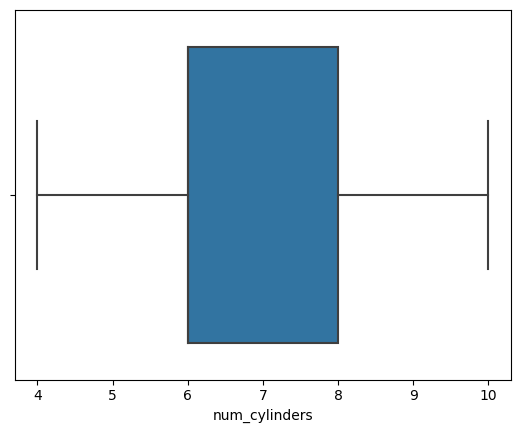

In [110]:
sns.boxplot(data=df, x="num_cylinders")

In [111]:
total_data = len(unedited_df)
total_outliers = len(unedited_df) - len(df)
data_without_outliers = total_data - total_outliers
removed_outlier_perc = (total_outliers / total_data) * 100

print(f"total data: {total_data:,}")
print(f"total outliers: {total_outliers:,}")
print(f"data without outliers: {data_without_outliers:,}")
print(f"percentage of outliers: {removed_outlier_perc:.2f}%")

total data: 54,273
total outliers: 5,969
data without outliers: 48,304
percentage of outliers: 11.00%


In [112]:
54273 / 5969


9.09247780197688

In [113]:
non_outliers.tail()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,horsepower,displacement,num_cylinders,engine_shape
54267,54267,Land,Rover,2020,69000,Hybrid,A/T,White,Black,0,32500,395,3.0,6,I
54268,54268,BMW,X6,2017,29000,Gasoline,A/T,White,Brown,0,29000,445,4.4,8,I
54269,54269,Audi,A4,2015,94634,E85 Flex Fuel,A/T,Black,Black,1,6500,220,2.0,4,I
54270,54270,Porsche,Cayenne,2013,40989,Gasoline,A/T,White,Black,1,18950,420,3.6,6,V
54272,54272,Audi,A5,2021,35000,Hybrid,A/T,Black,Black,0,37499,261,2.0,4,I


In [114]:
# TEST
# df["engine"] = unedited_df["engine"]
feature = "engine"
combined_df = pd.concat([df, test_df])
# combined_df["engine"].value_counts().tail(50)

# df.groupby(feature).head()
combined_df.nunique()

# df["engine"].value_counts().head(50)

# df["horsepower"] = df["engine"].apply(lambda x: x.split()[0])
# df["engine"].value_counts().head(50)


# # df.describe()
# test_df.loc[df["displacement"] != 'tmp', 'displacement'].value_counts().tail(50)

# df.loc[df["displacement"] != 'VALID', 'displacement'].mean()

# df.loc[ :, "displacement"].tail(50)
# df["engine"].tail(50)
# df[["engine", "num_cylinders"]].head(50)
# df["ext_col"].value_counts().head(50)
# df["ext_col"].value_counts().head(50)

# df.groupby("engine_shape")["engine_shape"].count().sort_values(ascending=False).head(50)
# df["engine_shape"].value_counts().tail(50).index

# df["accident"].head(50)
# combined_df.head(50)

1-len(df) / len(unedited_df)

0.10998102187091185

In [115]:
# unedited_df["accident"].head(50)
df.nunique()

id               48304
brand               50
model              478
model_year          23
milage            3052
fuel_type            4
transmission         2
ext_col             11
int_col             10
accident             2
price             1252
horsepower         301
displacement        51
num_cylinders        5
engine_shape         4
dtype: int64

In [116]:
115 / len(df) 

0.002380755216959258

In [117]:
32734 + 1087

33821

### Separate Features and Labels

In [118]:
# Set features similar to the test set only without id column
features = df.copy()
features.pop("id")

# Remove price column in features and save it in labels
labels = features.pop("price")
features.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,horsepower,displacement,num_cylinders,engine_shape
0,Ford,F-150,2018,74349,Gasoline,A/T,Blue,Gray,0,375,3.5,6,V
1,BMW,335,2007,80000,Gasoline,M/T,Black,Black,0,300,3.0,6,I
2,Jaguar,XF,2009,91491,Gasoline,A/T,Purple,Beige,0,300,4.2,8,I
3,BMW,X7,2022,2437,Hybrid,A/T,Gray,Brown,0,335,3.0,6,I
5,Acura,Integra,2003,124756,Gasoline,M/T,Red,Beige,1,140,1.8,4,I


In [119]:
labels.head()

0    11000
1     8250
2    15000
3    63500
5     4995
Name: price, dtype: int64

## Split Dataset

In [120]:
# Split the dataset into train (70%) and remain (30%) subsets
train_features, remain_features, train_labels, remain_labels = sklearn.model_selection.train_test_split(
    features, 
    labels,
    test_size=0.3,
    shuffle=True
)

# Split the remain subset into valid (70%) and test (30%) subset
valid_features, test_features, valid_labels, test_labels = sklearn.model_selection.train_test_split(
    remain_features, 
    remain_labels,
    test_size=0.3,
    shuffle=True
)

In [121]:
# Check if indices of features and labels still match
print(train_features.head().index)
print(train_labels.head().index)

print(test_features.head().index)
print(test_labels.head().index)

print(valid_features.head().index)
print(valid_labels.head().index)

Index([30285, 6311, 24104, 49576, 47722], dtype='int64')
Index([30285, 6311, 24104, 49576, 47722], dtype='int64')
Index([5588, 23043, 29532, 30097, 18332], dtype='int64')
Index([5588, 23043, 29532, 30097, 18332], dtype='int64')
Index([53737, 30502, 37096, 30957, 51698], dtype='int64')
Index([53737, 30502, 37096, 30957, 51698], dtype='int64')


In [122]:
# Check if dataset were split correctly
dataset_size = len(df)
print(dataset_size * 0.7, len(train_features), len(train_labels))
print(dataset_size * 0.3 * 0.7, len(valid_features), len(valid_labels))
print(dataset_size * 0.3 * 0.3, len(test_features), len(test_labels))

# Check if total of the subsets the same as dataset_size
dataset_size, len(train_features) + len(valid_features) + len(test_features), len(train_labels) + len(valid_labels) + len(test_labels)

33812.799999999996 33812 33812
10143.839999999998 10144 10144
4347.36 4348 4348


(48304, 48304, 48304)

## Build the model

In [123]:
model = tf.keras.Sequential(
    [
        # Input Layer, Normalized Layer Here 
        tf.keras.layers.Dense(units=128, activation="relu", name="Hidden Layer"),
        tf.keras.layers.Dense(units=1, activation="softmax", name="Output Layer"),
    ]
)



model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanSquaredError()],
)

## Train Model

In [124]:
# View an example of input
train_features

# Model fit

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,horsepower,displacement,num_cylinders,engine_shape
30285,Ford,F-150,2021,86281,Gasoline,A/T,Blue,Black,0,332,2.7,6,V
6311,Ford,F-250,2008,97700,Gasoline,A/T,Blue,Gray,0,300,5.4,8,I
24104,Land,Rover,2016,84000,Gasoline,A/T,White,Black,0,240,2.0,4,I
49576,Ford,F-150,2022,15000,Gasoline,A/T,White,Black,0,450,3.5,6,V
47722,Cadillac,Escalade,2021,18500,Gasoline,A/T,Black,Black,0,420,6.2,8,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24035,Kia,Sorento,2022,16400,Hybrid,A/T,Black,Black,0,261,2.0,4,I
21300,Ford,F-150,2018,51351,Gasoline,A/T,White,Black,0,332,3.5,6,V
21357,BMW,M3,2015,55000,Gasoline,M/T,Black,Black,0,425,3.0,6,I
3874,Chevrolet,Camaro,2019,45000,Gasoline,M/T,Gray,Black,0,455,6.2,8,I


## Predict

TODO
- build model
- separate engine into different parameters
- remove id on train
- train model
- early stop
- graph result
- group lines
- find outliers

In [125]:
# train_subset.shape

In [126]:
# valid_subset.shape

In [127]:
# test_subset.shape